In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy.integrate import cumtrapz
from scipy.constants import c
import scienceplots

plt.style.use("science")


initial = 0

def hubble_param(z, Omega_r, Omega_m, Omega_k, Omega_a):
    E_z = np.sqrt(Omega_r*(1+z)**4 + Omega_m*(1+z)**3 + Omega_k*(1+z)**2 + Omega_a)
    return E_z

def comoving_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a):
    E_z_vals = hubble_param(z, Omega_r, Omega_m, Omega_k, Omega_a)
    d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
    return d_c

def transverse_comoving_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a):
    E_z_vals = hubble_param(z, Omega_r, Omega_m, Omega_k, Omega_a)
    d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
    if Omega_k > 0:
        d_m = d_h / np.sqrt(Omega_k) * np.sinh(np.sqrt(Omega_k) * d_c /d_h)
    elif Omega_k < 0:
        d_m = d_h / np.sqrt(Omega_k) * np.sin(np.sqrt(np.abs(Omega_k)) * d_c /d_h)
    else:
        d_m = d_c
    return d_m

def angular_diameter(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a):
    d_a = transverse_comoving_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a) / (1+z)
    return d_a

def luminosity_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a):
    ld = (1+z) * transverse_comoving_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a)
    return ld

def light_travel_distance(d_h, z, Omega_r, Omega_m, Omega_k, Omega_a):
    E_z_vals = hubble_param(z, Omega_r, Omega_m, Omega_k, Omega_a)
    d_lt = d_h * cumtrapz(1 / (1+z) / E_z_vals, z, initial=initial)
    return d_lt

def hubble_distance(H_0):
    d_h = c / 1e3 / H_0
    return d_h

H_0 = 72

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:19: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:24: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:43: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_lt = d_h * cumtrapz(1 / (1+z) / E_z_vals, z, initial=initial)


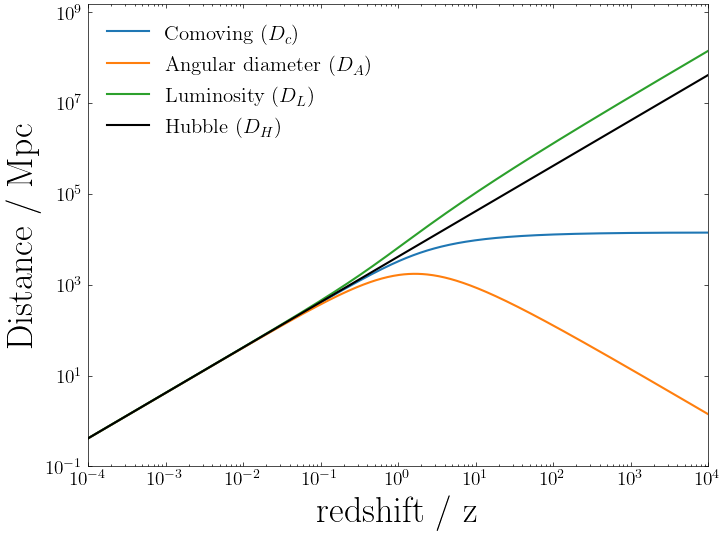

In [28]:
values = {
    'd_h': hubble_distance(H_0),
    'z': np.logspace(-10, 5, 1000),
    'Omega_a': 0.732,
    'Omega_m': 0.266,
    'Omega_r': 0.266 / 3454,
}
values['Omega_k'] = 1 - (values['Omega_r'] + values['Omega_m'] + values['Omega_a'])

cmd_vals = comoving_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

tcmd_vals = transverse_comoving_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

ltd_vals = light_travel_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

ad_vals = angular_diameter(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

lumd_vals = luminosity_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

naive_hub = hubble_distance(H_0) * values['z']

custom_colors = ['#1f77b4',  # muted blue
                 '#ff7f0e',  # safety orange
                 '#2ca02c',  # cooked asparagus green
                 '#000000',  # blue-teal
                 '#d62728',  # brick red
                 '#bcbd22']  # dirty yellow

# Set the color cycle for the plot
#plt.rc('axes', prop_cycle=(plt.cycler('color', custom_colors)))

#plt.plot(np.log10values['z'], np.log10(tcmd_vals))
plt.figure(figsize=(8, 6))
plt.plot(values['z'], cmd_vals, label = r'Comoving ($D_c$)', linewidth=1.5)
#plt.plot(values['z'], tcmd_vals * 3.262 / 1e3, label = 'transverse comoving')
#plt.plot(values['z'], ltd_vals, label = 'Light travel')
plt.plot(values['z'], ad_vals, label = r'Angular diameter ($D_A$)', linewidth=1.5)
plt.plot(values['z'], lumd_vals, label = r'Luminosity ($D_L$)', linewidth=1.5)
plt.plot(values['z'], naive_hub, label = r'Hubble ($D_H$)', linewidth=1.5)
plt.legend(prop={'size': 15})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(1e-4, 10000)
plt.ylim(1e-1,)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift / z', fontsize=26)
plt.ylabel('Distance / Mpc', fontsize=26)
plt.savefig("./distance_measures_over_redshift.png", dpi=300)
plt.show()

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:24: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:19: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_c = d_h * cumtrapz(1 / E_z_vals, z, initial=initial)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3801589145.py:43: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  d_lt = d_h * cumtrapz(1 / (1+z) / E_z_vals, z, initial=initial)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_38654/3514052083.py:42: RuntimeWarning: invalid value encountered

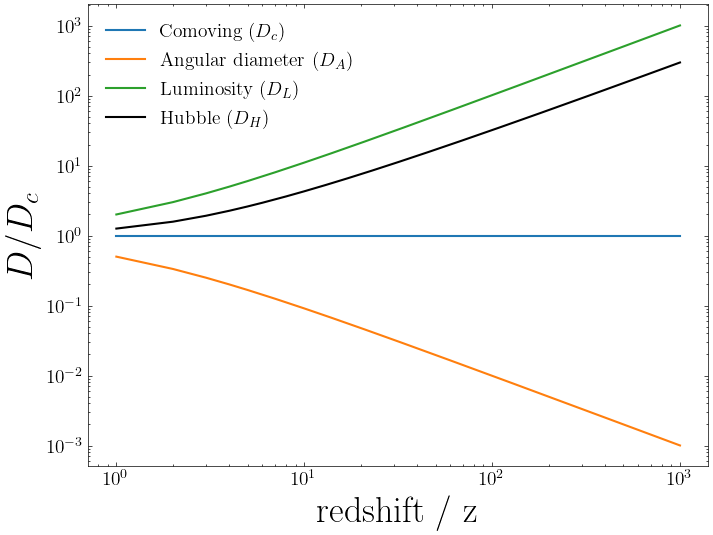

In [35]:
plt.figure(figsize=(8, 6))
values['z'] = np.linspace(1e-6,1e3, 1000)

lumd_vals = luminosity_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

ad_vals = angular_diameter(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

cmd_vals = comoving_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

ltd_vals = light_travel_distance(
    d_h=values['d_h'],
    z=values['z'],
    Omega_r=values['Omega_r'],
    Omega_m=values['Omega_m'],
    Omega_k=values['Omega_k'],
    Omega_a=values['Omega_a']
    )

naive_hub = hubble_distance(H_0) * values['z']

plt.plot(values['z'], cmd_vals/cmd_vals, label = r'Comoving ($D_c$)', linewidth=1.5)
#plt.plot(values['z'], tcmd_vals * 3.262 / 1e3, label = 'transverse comoving')
#plt.plot(values['z'], ltd_vals, label = 'Light travel')
plt.plot(values['z'], ad_vals/cmd_vals, label = r'Angular diameter ($D_A$)', linewidth=1.5)
plt.plot(values['z'], lumd_vals/cmd_vals, label = r'Luminosity ($D_L$)', linewidth=1.5)
plt.plot(values['z'], naive_hub/cmd_vals, label = r'Hubble ($D_H$)', linewidth=1.5)
plt.legend(prop={'size': 15})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.xscale('log')
plt.yscale('log')
plt.xlabel("redshift / z", fontsize=26)
plt.ylabel(r"$D/D_c$", fontsize=26)
#plt.xlim(1e-4, 10000)

plt.legend(prop={'size': 14})
plt.savefig("./ratio_of_measures.png", dpi=300)